In [1]:
import pandas as pd
import numpy as np
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn

In [2]:
print(pd)
print("pandas v"+pd.__version__)
print("matplotlib v"+matplotlib.__version__)
print("seaborn v"+seaborn.__version__)

<module 'pandas' from 'C:\\Users\\Napat-PC\\anaconda3\\envs\\tensorflow_nightly\\lib\\site-packages\\pandas\\__init__.py'>
pandas v1.1.2
matplotlib v3.3.2
seaborn v0.11.0


## Environment variables

In [7]:
## Define local database connection
MYSQL_HOST = 'localhost'
MYSQL_USER = 'root'
MYSQL_PASSWORD = 'password'
MYSQL_DB = 'f1_db'

# 1) Load data

In [5]:
def get_df(sql_statement):
    cnx = pymysql.connect(host=MYSQL_HOST, user=MYSQL_USER, password=MYSQL_PASSWORD, db=MYSQL_DB)
    df = pd.read_sql(sql_statement, con=cnx)
    cnx.close()
    return df

In [14]:
#### Please note I already prepare this table by using SQL to merge,join,extract then create custom view in my local database

In [34]:
df = get_df(f"""
            SELECT * FROM f1_db.combine_for_prediction;
            """)
df.head()

,driverRef,d_nationality,constructorRef,t_nationality,year,round,grand_prix,circuitRef,statusId,status,...,q2,q2_pos,q3,q3_pos,q_pos,pitstop_duration,pitstop_rank,fastest_lap_rank,final_grid,final_pos
0,vettel,German,red_bull,Austrian,2011,1,Australian Grand Prix,albert_park,1,Finished,...,1:24.090,1,1:23.529,1,1,23.32,3,4,1,1
1,hamilton,British,mclaren,British,2011,1,Australian Grand Prix,albert_park,1,Finished,...,1:24.595,2,1:24.307,2,2,23.21,2,8,2,2
2,petrov,Russian,renault,French,2011,1,Australian Grand Prix,albert_park,1,Finished,...,1:25.582,7,1:25.247,6,6,25.11,18,7,6,3
3,alonso,Spanish,ferrari,Italian,2011,1,Australian Grand Prix,albert_park,1,Finished,...,1:25.242,5,1:24.974,5,5,24.06,8,2,5,4
4,webber,Australian,red_bull,Austrian,2011,1,Australian Grand Prix,albert_park,1,Finished,...,1:24.658,3,1:24.395,3,3,24.06,8,3,3,5


# 2) Data Preparation

## Missing data

In [35]:
df.isnull().sum(axis = 0)

driverRef              0
d_nationality          0
constructorRef         0
t_nationality          0
year                   0
round                  0
grand_prix             0
circuitRef             0
statusId               0
status                 0
laps                   0
age_at_race            0
q1                    29
q1_pos                 0
q2                   921
q2_pos                 0
q3                  1849
q3_pos                 0
q_pos                  0
pitstop_duration       0
pitstop_rank           0
fastest_lap_rank       0
final_grid             0
final_pos              0
dtype: int64

## Features distribution

In [38]:
df.describe()

,year,round,statusId,laps,age_at_race,q1_pos,q2_pos,q3_pos,q_pos,pitstop_duration,pitstop_rank,fastest_lap_rank,final_grid,final_pos
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,2015.209524,10.235450,8.403439,56.476984,27.889497,10.505026,9.891270,7.733862,11.090212,24.446738,10.529365,10.538095,10.989947,10.560847
std,2.810974,5.703591,16.437294,12.437481,5.120913,5.900895,5.231105,3.810900,6.246719,3.784602,5.937438,5.978517,6.259190,5.950199
min,2011.000000,1.000000,1.000000,1.000000,17.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2013.000000,5.000000,1.000000,52.000000,23.900000,5.000000,5.000000,5.000000,6.000000,22.020000,5.000000,5.000000,6.000000,5.000000
50%,2015.000000,10.000000,1.000000,56.000000,27.200000,10.000000,10.000000,9.000000,11.000000,23.580000,10.000000,10.000000,11.000000,10.000000
75%,2018.000000,15.000000,11.000000,66.000000,31.200000,15.000000,15.000000,10.000000,16.000000,25.800000,15.000000,15.000000,16.000000,15.000000
max,2020.000000,21.000000,137.000000,78.000000,43.900000,24.000000,20.000000,20.000000,24.000000,59.290000,24.000000,24.000000,24.000000,24.000000


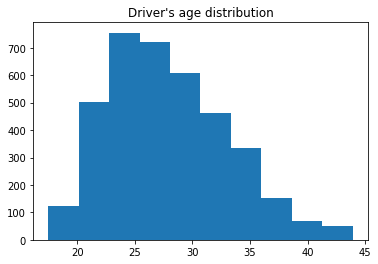

In [86]:
plt.hist(df.loc[:,"age_at_race"].values,)
plt.title("Driver's age distribution")
plt.show()

## Correlation Matrix

<AxesSubplot:>

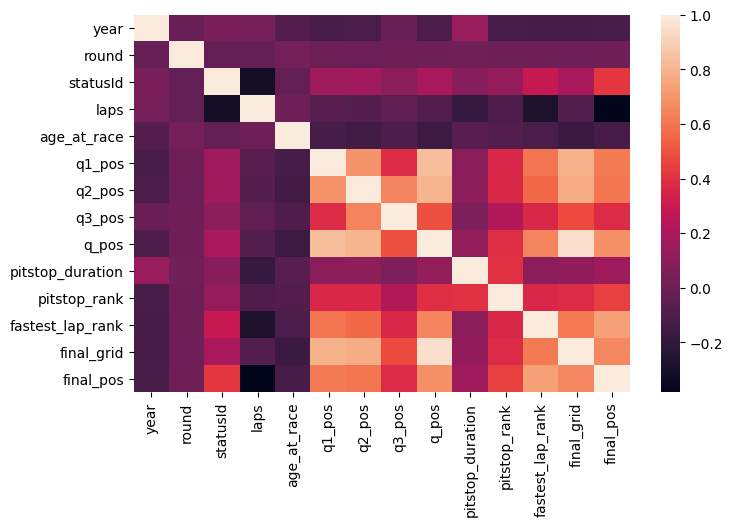

In [87]:
import seaborn as sns
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(8,5), dpi=100)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Feature extraction

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   driverRef         3780 non-null   object 
 1   d_nationality     3780 non-null   object 
 2   constructorRef    3780 non-null   object 
 3   t_nationality     3780 non-null   object 
 4   year              3780 non-null   int64  
 5   round             3780 non-null   int64  
 6   grand_prix        3780 non-null   object 
 7   circuitRef        3780 non-null   object 
 8   statusId          3780 non-null   int64  
 9   status            3780 non-null   object 
 10  laps              3780 non-null   int64  
 11  age_at_race       3780 non-null   float64
 12  q1                3751 non-null   object 
 13  q1_pos            3780 non-null   int64  
 14  q2                2859 non-null   object 
 15  q2_pos            3780 non-null   int64  
 16  q3                1931 non-null   object 


In [106]:
### Add Moving Average, Exponential Moving average using past N position
df_2 = df.copy()
driver_past_performance = { x: np.array([]) for x in df["driverRef"].unique()}
driver_past_ema_5 = { x: np.array([]) for x in df["driverRef"].unique()}
driver_past_ema_10 = { x: np.array([]) for x in df["driverRef"].unique()}
for idx, row in df_2.iterrows():
    SMA_5_pos = round(driver_past_performance[row["driverRef"]][-5:].mean(), 1)
    SMA_10_pos = round(driver_past_performance[row["driverRef"]][-10:].mean(), 1)
    df_2.loc[idx,"SMA_5_pos"] = SMA_5_pos
    df_2.loc[idx,"SMA_10_pos"] = SMA_10_pos
    # EMA_5_pos = x * (2/6) + last_EMA_5_pos * (4/6)
    if len(driver_past_ema_5[row["driverRef"]]) > 0:
        EMA_5_pos = round(driver_past_performance[row["driverRef"]][-1:][0] * (2/6) + driver_past_ema_5[row["driverRef"]][-1:][0] * (4/6), 1)
        EMA_10_pos = round(driver_past_performance[row["driverRef"]][-1:][0] * (2/11) + driver_past_ema_10[row["driverRef"]][-1:][0] * (9/11), 1)
    elif len(driver_past_performance[row["driverRef"]]) > 0 :
        EMA_5_pos = driver_past_performance[row["driverRef"]][-1:][0]
        EMA_10_pos = driver_past_performance[row["driverRef"]][-1:][0]
    else:
        EMA_5_pos = np.nan
        EMA_10_pos = np.nan
    df_2.loc[idx,"EMA_5_pos"] = EMA_5_pos
    df_2.loc[idx,"EMA_10_pos"] = EMA_10_pos
    if row["year"] == 2012 and row["driverRef"] == "hamilton":
        print(f"year = {row['year']}, round = {row['round']}, driver = {row['driverRef']}, last_5_pos = {driver_past_performance[row['driverRef']][-5:]} SMA_5_pos = {SMA_5_pos} EMA_5_pos = {EMA_5_pos} EMA_10_pos = {EMA_10_pos}")
    # Update past performance
    driver_past_performance[row["driverRef"]] = np.append(driver_past_performance[row["driverRef"]], row["final_pos"])
    if not np.isnan(EMA_5_pos):
        driver_past_ema_5[row["driverRef"]] = np.append(driver_past_ema_5[row["driverRef"]], EMA_5_pos)
        driver_past_ema_10[row["driverRef"]] = np.append(driver_past_ema_10[row["driverRef"]], EMA_10_pos)

<ipython-input-106-b4026802c78c>:6: RuntimeWarning: Mean of empty slice.
  SMA_5_pos = round(driver_past_performance[row["driverRef"]][-5:].mean(), 1)
<ipython-input-106-b4026802c78c>:7: RuntimeWarning: Mean of empty slice.
  SMA_10_pos = round(driver_past_performance[row["driverRef"]][-10:].mean(), 1)


year = 2012, round = 1, driver = hamilton, last_5_pos = [ 5.  2.  7.  1. 22.] SMA_5_pos = 7.4 EMA_5_pos = 10.0 EMA_10_pos = 7.8
year = 2012, round = 2, driver = hamilton, last_5_pos = [ 2.  7.  1. 22.  3.] SMA_5_pos = 7.0 EMA_5_pos = 7.7 EMA_10_pos = 6.9
year = 2012, round = 3, driver = hamilton, last_5_pos = [ 7.  1. 22.  3.  3.] SMA_5_pos = 7.2 EMA_5_pos = 6.1 EMA_10_pos = 6.2
year = 2012, round = 4, driver = hamilton, last_5_pos = [ 1. 22.  3.  3.  3.] SMA_5_pos = 6.4 EMA_5_pos = 5.1 EMA_10_pos = 5.6
year = 2012, round = 5, driver = hamilton, last_5_pos = [22.  3.  3.  3.  8.] SMA_5_pos = 7.8 EMA_5_pos = 6.1 EMA_10_pos = 6.0
year = 2012, round = 6, driver = hamilton, last_5_pos = [3. 3. 3. 8. 8.] SMA_5_pos = 5.0 EMA_5_pos = 6.7 EMA_10_pos = 6.4
year = 2012, round = 7, driver = hamilton, last_5_pos = [3. 3. 8. 8. 5.] SMA_5_pos = 5.4 EMA_5_pos = 6.1 EMA_10_pos = 6.1
year = 2012, round = 8, driver = hamilton, last_5_pos = [3. 8. 8. 5. 1.] SMA_5_pos = 5.0 EMA_5_pos = 4.4 EMA_10_pos = 5.

# 3) Create baseline model

## Model A1 - Predict Final Position equal Grid position

In [112]:
### Train data: year 2012 - 2018
### Test data: year 2019

In [164]:
X_train = df_2.copy()
X_test = df_2.copy()
X_train = X_train[(X_train["year"] >= 2012) & (X_train["year"] <= 2018)]
X_test = X_test[X_test["year"] == 2019]
y_train = X_train["final_pos"].to_numpy()
y_test = X_test["final_pos"].to_numpy()
X_train = X_train.drop(columns=["final_pos"])
X_train = X_train.reset_index(drop=True)
X_test = X_test.drop(columns=["final_pos"])
X_test = X_test.reset_index(drop=True)

In [142]:
print(f"train size = {len(X_train)}")
print(f"test size = {len(X_test)}")

train size = 2730
test size = 407


### Feature selection

In [177]:
X_train_t = X_train[["final_grid"]]
X_test_t = X_test[["final_grid"]]

### Define Model 

In [169]:
y_train_pred = X_train_t["final_grid"].to_numpy()
y_test_pred = X_test_t["final_grid"].to_numpy()
display(pd.DataFrame({"y_train_pred":y_train_pred,"y_train_actual":y_train}).head())

,y_train_pred,y_train_actual
0,2,1
1,6,2
2,1,3
3,5,4
4,12,5


### Model evaluation on Train data

In [189]:
from sklearn.metrics import mean_absolute_error
print(f"(Model A1) Train MAE = {round(mean_absolute_error(y_train, y_train_pred),3)}")

(Model A1) Train MAE = 3.615


In [190]:
from sklearn.metrics import r2_score
train_r2 = round(r2_score(y_train, y_train_pred),3)
print(f"(Model A1) Train R-squared = {train_r2}")
adj_train_r2 = round((1 - (1 - train_r2) * ((X_train_t.shape[0] - 1) / (X_train_t.shape[0] - X_train_t.shape[1] - 1))), 3)
print(f"(Model A1) Train Adjusted R-squared = {adj_train_r2}")

(Model A1) Train R-squared = 0.252
(Model A1) Train Adjusted R-squared = 0.252


### Model evaluation on Test data

In [191]:
from sklearn.metrics import mean_absolute_error
print(f"(Model A1) Test MAE = {round(mean_absolute_error(y_test, y_test_pred),3)}")

(Model A1) Test MAE = 3.474


In [192]:
from sklearn.metrics import r2_score
test_r2 = round(r2_score(y_test, y_test_pred),3)
print(f"(Model A1) Test R-squared = {test_r2}")
adj_test_r2 = round((1 - (1 - test_r2) * ((X_test_t.shape[0] - 1) / (X_test_t.shape[0] - X_test_t.shape[1] - 1))), 3)
print(f"(Model A1) Test Adjusted R-squared = {adj_test_r2}")

(Model A1) Test R-squared = 0.201
(Model A1) Test Adjusted R-squared = 0.199


<b> ## Result note </b> <br>
Model A1 (Baseline) has MAE on Test data = 3.474 and Adjusted R-Squared ~ 20%

## Model A2 - Using Linear Regression One variable